In [37]:
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
# drop_duplicates
data_dropped = data.drop_duplicates()
# Features
X = data_dropped.iloc[:, :-1]
# Labels
y = data_dropped["fetal_health"].astype(int) # Pandas series shares some functions with NumPy!

In [4]:
# X.head
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


<Axes: xlabel='fetal_health', ylabel='count'>

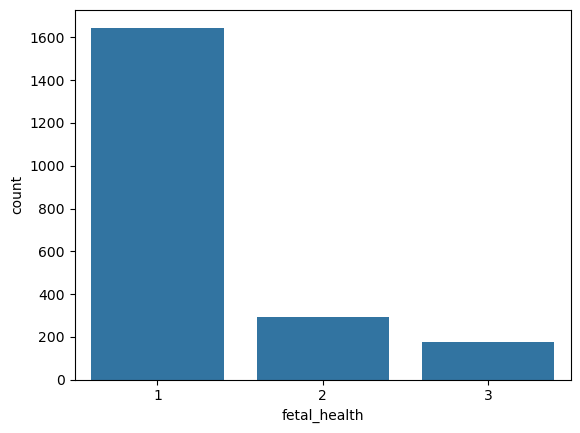

In [7]:
# countplot - check the proportion visually
sns.countplot(x=y)

In [8]:
# series.value counts - check the proportion
y.value_counts()

fetal_health
1    1646
2     292
3     175
Name: count, dtype: int64

In [9]:
# proportion
y.value_counts() / len(y)

fetal_health
1    0.778987
2    0.138192
3    0.082821
Name: count, dtype: float64

In [10]:
# isna - Missing data check
X.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
X.duplicated().sum()

2

In [12]:
X_dropped = X[~X.duplicated()]
y_dropped = y[~X.duplicated()]

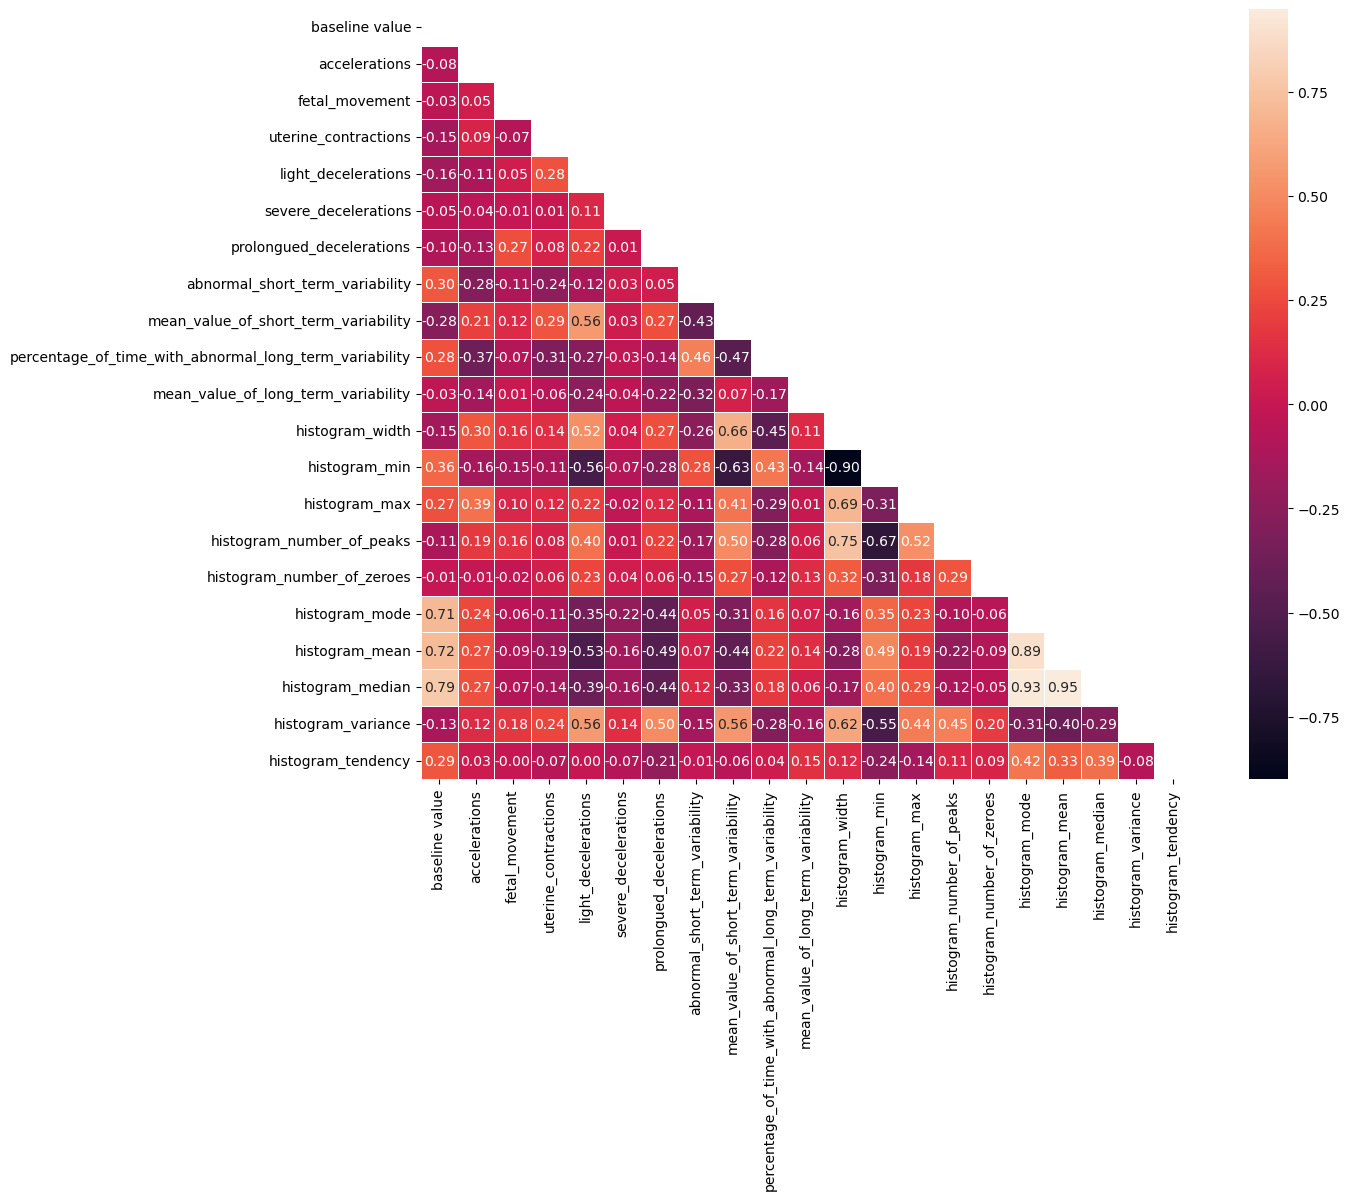

In [13]:
# Correlation check - among the features
mat = X_dropped.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=True)

(0.0, 22.0)

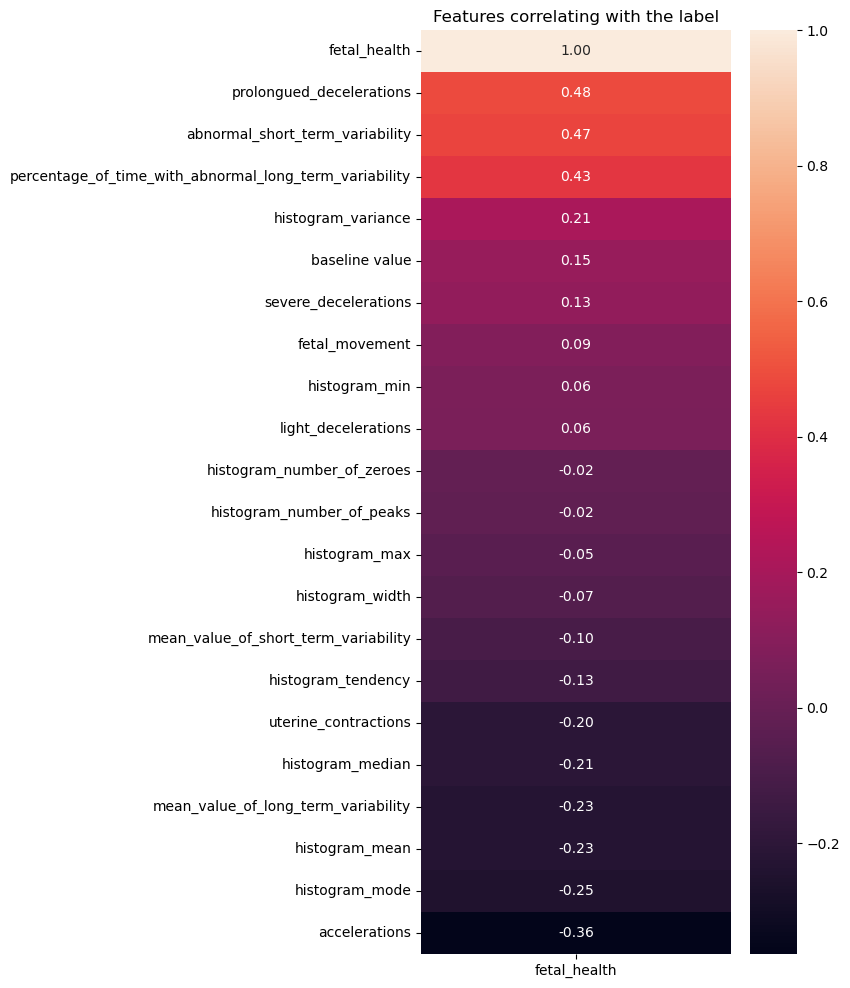

In [14]:
# Correlation check - features and the label
plt.figure(figsize=(5, 12))
heatmap = sns.heatmap(data.corr()[['fetal_health']].sort_values(by='fetal_health', ascending=True), fmt="0.2f", annot=True)
heatmap.set_title('Features correlating with the label')
heatmap.set_ylim([0,22])

In [17]:
# Create X_train, X_test, y_train, y_test using train_test_split with stratification. Set test size=0.3.
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_dropped, test_size=0.3, stratify=y_dropped)

In [18]:
# StandardScaler
# X_train_scaled, X_test_scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X=X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = scaler.transform(X=X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [19]:
# describe - standardized mean and standard deviation
X_train_scaled.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,...,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03
mean,-1.018669e-15,-8.178217e-17,-2.886430e-17,-2.285090e-16,-9.200494e-17,6.013395e-18,-3.848573e-17,1.250786e-16,-6.494466e-17,-3.006697e-17,...,1.785978e-16,1.755911e-16,-1.407134e-16,-7.095806e-17,-3.608037e-18,7.733226e-16,7.715186e-16,3.006697e-17,1.443215e-17,4.810716e-17
std,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,...,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00
min,-2.805838e+00,-8.194563e-01,-2.086221e-01,-1.492736e+00,-6.304821e-01,-5.828155e-02,-2.667140e-01,-1.970169e+00,-1.257129e+00,-5.368477e-01,...,-1.710192e+00,-1.485786e+00,-2.336668e+00,-1.378878e+00,-4.558206e-01,-4.768343e+00,-4.016766e+00,-4.287585e+00,-6.414802e-01,-2.153154e+00
25%,-7.577405e-01,-8.194563e-01,-2.086221e-01,-8.089798e-01,-6.304821e-01,-5.828155e-02,-2.667140e-01,-8.704624e-01,-6.968456e-01,-5.368477e-01,...,-8.667504e-01,-9.110780e-01,-6.621126e-01,-6.908365e-01,-4.558206e-01,-5.216996e-01,-6.341984e-01,-6.412150e-01,-5.730068e-01,-5.231138e-01
50%,-4.090648e-02,-2.970839e-01,-2.086221e-01,2.166538e-01,-6.304821e-01,-5.828155e-02,-2.667140e-01,5.560645e-02,-1.365620e-01,-5.368477e-01,...,-9.998571e-02,3.550011e-02,-1.597460e-01,-3.468158e-01,-4.558206e-01,9.375592e-02,8.134475e-02,6.001005e-02,-4.018233e-01,-5.231138e-01
75%,7.783324e-01,7.476610e-01,-1.489831e-01,9.004096e-01,3.740724e-01,-5.828155e-02,-2.667140e-01,8.080374e-01,4.237216e-01,5.236831e-02,...,7.945731e-01,8.806592e-01,5.658946e-01,6.852465e-01,-4.558206e-01,6.476659e-01,6.667891e-01,6.911126e-01,1.802004e-01,1.106926e+00
max,2.724025e+00,3.881896e+00,9.353498e+00,3.293555e+00,4.392290e+00,1.715809e+01,8.114915e+00,2.255020e+00,6.362728e+00,4.337575e+00,...,2.711485e+00,2.199107e+00,4.138279e+00,4.125454e+00,1.359944e+01,2.986397e+00,2.943517e+00,3.145400e+00,8.568190e+00,1.106926e+00


In [20]:
y_train.value_counts()

fetal_health
1    1151
2     204
3     122
Name: count, dtype: int64

In [22]:
# Define RandomOverSampler to a variable ros
# ratio
ros = RandomOverSampler(random_state=12345) # random seed
# Create X_resampled, y_resampled using the fit_resample method or fit + sample.
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

In [23]:
# value_counts
y_train_resampled.value_counts()

fetal_health
1    1151
2    1151
3    1151
Name: count, dtype: int64

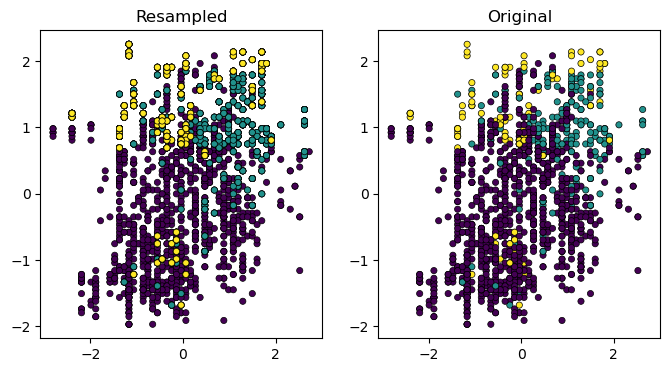

In [24]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].scatter(X_train_resampled.iloc[:, 0], X_train_resampled.iloc[:, 7], c=y_train_resampled, s=20, linewidth=0.5, edgecolor='black')
ax[1].scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 7], c=y_train, s=20, linewidth=0.5, edgecolor='black')
ax[0].set_title("Resampled")
ax[1].set_title("Original")
plt.show()

In [26]:
# SMOTE, ADASYN
# SMOTE is weak when we have a few outliers that do not contribute the classification performance.
# X_resampled_SMOTE, y_resampled_SMOTE
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X_train_scaled, y_train)
# X_resampled_ADASYN, y_resampled_ADASYN
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X_train_scaled, y_train)

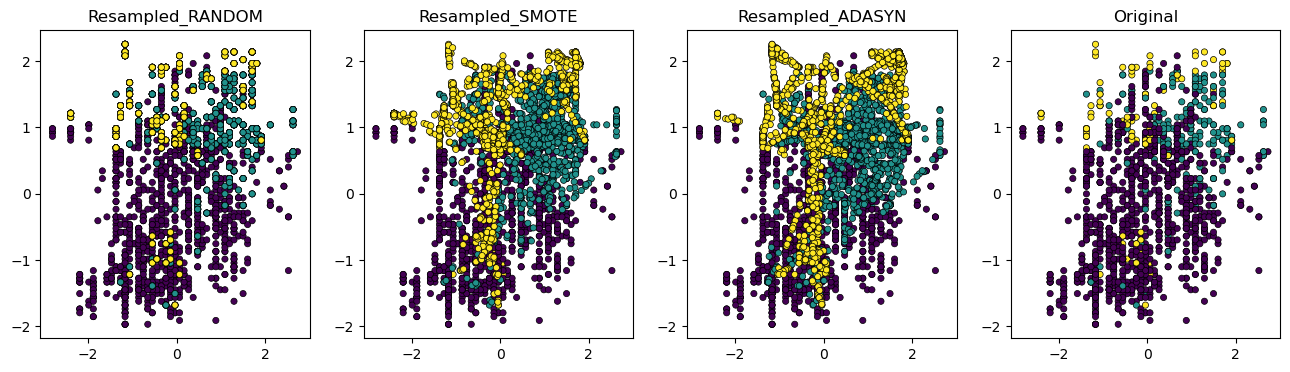

In [27]:
fig, ax = plt.subplots(1, 4, figsize=[16, 4])
ax[0].scatter(X_train_resampled.iloc[:, 0], X_train_resampled.iloc[:, 7], c=y_train_resampled, s=20, linewidth=0.5, edgecolor='black')
ax[1].scatter(X_resampled_SMOTE.iloc[:, 0], X_resampled_SMOTE.iloc[:, 7], c=y_resampled_SMOTE, s=20, linewidth=0.5, edgecolor='black')
ax[2].scatter(X_resampled_ADASYN.iloc[:, 0], X_resampled_ADASYN.iloc[:, 7], c=y_resampled_ADASYN, s=20, linewidth=0.5, edgecolor='black')
ax[3].scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 7], c=y_train, s=20, linewidth=0.5, edgecolor='black')
ax[0].set_title("Resampled_RANDOM")
ax[1].set_title("Resampled_SMOTE")
ax[2].set_title("Resampled_ADASYN")
ax[3].set_title("Original")

plt.show()

In [29]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()
svm = SVC()

In [30]:
voting = VotingClassifier([('lr', lr), ('dt', dt), ('svm', svm)], voting='hard')
voting

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC())])

In [31]:
# fit the method on X_train_scaled and y_train
voting.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()), ('svm', SVC())])

In [32]:
for clf in (dt, lr, svm, voting):
  clf.fit(X_resampled_SMOTE, y_resampled_SMOTE)
  print(clf.__class__.__name__, clf.score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9022082018927445
LogisticRegression 0.8643533123028391
SVC 0.8848580441640379
VotingClassifier 0.889589905362776


In [33]:
for clf in (dt, lr, svm, voting):
  clf.fit(X_resampled_ADASYN, y_resampled_ADASYN)
  print(clf.__class__.__name__, clf.score(X_test_scaled, y_test))

DecisionTreeClassifier 0.889589905362776
LogisticRegression 0.8548895899053628
SVC 0.8738170347003155
VotingClassifier 0.88801261829653


In [34]:
for clf in (dt, lr, svm, voting):
  clf.fit(X_train_scaled, y_train)
  print(clf.__class__.__name__, clf.score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9037854889589906
LogisticRegression 0.8927444794952681
SVC 0.9100946372239748
VotingClassifier 0.9116719242902208


In [36]:
y_pred = voting.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95       494
           2       0.71      0.69      0.70        87
           3       0.98      0.79      0.88        53

    accuracy                           0.91       634
   macro avg       0.88      0.82      0.84       634
weighted avg       0.91      0.91      0.91       634



In [38]:
# max_features, bootstrap_features
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train_scaled, y_train)
bag_clf.score(X_test_scaled, y_test)

0.9242902208201893

In [39]:
#oob_score = True
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, 
                            bootstrap = True, n_jobs = -1, oob_score=True)
bag_clf.fit(X_train_scaled, y_train)
bag_clf.score(X_test_scaled, y_test)

0.9227129337539433

In [ ]:
# After training, check the score from oob_score_.
bag_clf.oob_score_

0.950575490859851

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9321766561514195

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
# AdaBoostClasifier
# - base_estimator -> default estimator is Decision Stump
ab = AdaBoostClassifier()
ab.fit(X_train_scaled, y_train)
print(ab.score(X_test_scaled, y_test))

0.9085173501577287


In [46]:
# - base_estimator = LogisticRegression()
ab = AdaBoostClassifier(estimator=LogisticRegression())
ab.fit(X_train_scaled, y_train)
print(ab.score(X_test_scaled, y_test))

0.8659305993690851


In [47]:
# - XGBoost
import xgboost as xgb

In [48]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Then train the model
xgbm = xgb.XGBClassifier()
xgbm.fit(X_train_scaled, y_train_encoded)
print(xgbm.score(X_test_scaled, y_test_encoded))


0.9384858044164038


In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [50]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Our parameter distribution (or parameter grid in the case of grid search)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Randomized Search

Compared to the grid search, the randomized search has some randomness and iterations, so it has a few more parameters such as **n_iter**, **random_state**. Also, the parameter grid is now called parameter distributions as it can also receive a distribution (such as **scipy.stats.uniform**) and sample from it.

Randomized search is greatly helpful when we have many options to search as it randomly choose the combination. However, it does not guarantee that it will find the optimal solution, but still it will give you similar result with the grid search. However, if you only have a limited number of parameter combinations, it is still the best to apply the grid search.

In [51]:
# RandomizedSearchCV - create the randomized search instance with those parameters
# - estimator: random forest
# - param_distribution: random_grid
# - n_iter: 100
# - cv: 3

# We also have those optional parameters
# - random_state
# - refit (default = True)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [52]:
%%time
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: total: 11.2 s
Wall time: 48.1 s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [53]:
# best_estimator
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=70, n_estimators=600)

In [54]:
# best_score
rf_random.best_score_

0.9498974807192292

In [55]:
# test score
rf_random.score(X_test_scaled, y_test)

0.9274447949526814

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures

In [57]:
# Create a pipeline
# - featureGenerator = PolynomialFeatures
# - scaler = StandardScaler
# - selector = VarianceThreshold with 0.1
# - classifier = RandomForestClassifier
# etc: LabelEncoder ... OneHotEncoder ... KBinsDiscretizer ... SimpleImputer

pipe = Pipeline([
  ('featureGenerator', PolynomialFeatures()),
  ('scaler', StandardScaler()),
  ('selector', VarianceThreshold(0.1)),
  ('classifier', RandomForestClassifier())
])





In [58]:
pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('featureGenerator', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0.1)),
                ('classifier', RandomForestClassifier())])

In [59]:
print('Training set score: ' + str(pipe.score(X_train_scaled, y_train)))
print('Test set score: ' + str(pipe.score(X_test_scaled, y_test)))

Training set score: 1.0
Test set score: 0.9353312302839116


In [60]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings("ignore")

In [ ]:
class SquaredFeatureTransformer(BaseEstimator, TransformerMixin):
  #This class will transform the dataset by adding squared features

  def __init__(self):
    
    return None

  def fit(self, X, y = None):

    return None

  def transform(self, X, y = None):
    X_squared = X ** 2
    #X_squared.columns = [f'{col}_squared' for col in X.columns]
    X_final = np.hstack([X, X_squared])
    return X_final

pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('squared', SquaredFeatureTransformer()),
  ('selector', VarianceThreshold(0.1)),
  ('classifier', RandomForestClassifier())
])

In [63]:
# Define the parameter grid

scaler_list = [StandardScaler(), MinMaxScaler()]
classifier_list = [AdaBoostClassifier(), RandomForestClassifier()]
selector_list = [0, 0.001, 0.01]


parameters = {
    'scaler': scaler_list,
    'selector__threshold': selector_list,
    'classifier': classifier_list
}

pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('selector', VarianceThreshold()),
  ('classifier', RandomForestClassifier())
])

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=2)

In [64]:
data = load_breast_cancer()
X, y= data.data, data.target

final_accuracy_dict = {
    'RandomForest': [],
    'AdaBoost': []
}

best_params = {
    'RandomForest': {'params': None, 'score': 0},
    'AdaBoost': {'params': None, 'score': 0}
}

classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10]
    },
    
    'AdaBoost': {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1]
    }
    
}

stratified_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
outer_fold = stratified_cv.split(X, y)

for train_idx, test_idx in outer_fold:
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    for clf_name, clf in classifiers.items():
        pipe = Pipeline([
            #('featureGenerator', PolynomialFeatures()),
            ('scaler', StandardScaler()),
            ('selector', VarianceThreshold()),
            ('classifier', clf)
        ])

        param_grid = param_grids[clf_name]
        inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
        grid_search = GridSearchCV(
            pipe, 
            param_grid,
            cv=inner_cv, 
            scoring='accuracy',
            n_jobs=-1
            )
        
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        final_accuracy_dict[clf_name].append(accuracy)
        
        if accuracy > best_params[clf_name]['score']:
            best_params[clf_name]['score'] = accuracy
            best_params[clf_name]['params'] = grid_search.best_params_


# Calculate the average accuracy for each classifier
final_accuracy_dict = {clf_name: np.mean(accuracy) for clf_name, accuracy in final_accuracy_dict.items()}
print(final_accuracy_dict)
#print(best_params)



{'RandomForest': 0.9543056585124783, 'AdaBoost': 0.9525698047936744}
